# Data Input

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
base_dir = '/content/drive/MyDrive/CL'
!ls "/content/drive/MyDrive/CL"

bahan  latih  validasi


In [ ]:
bahan_dir = os.path.join(base_dir, 'bahan')
train_dir = os.path.join(base_dir, 'latih')
validation_dir = os.path.join(base_dir, 'validasi')

# Direktori Drive

In [ ]:
bahan_dir = os.path.join(base_dir, 'bahan')

buick_dir = os.path.join(bahan_dir, 'Buick')
chery_dir = os.path.join(bahan_dir, 'Chery')
citroen_dir = os.path.join(bahan_dir, 'Citroen')
honda_dir = os.path.join(bahan_dir, 'Honda')
hyundai_dir = os.path.join(bahan_dir, 'Hyundai')
lexus_dir = os.path.join(bahan_dir, 'Lexus')
mazda_dir = os.path.join(bahan_dir, 'Mazda')
peugeot_dir = os.path.join(bahan_dir, 'Peugeot')
toyota_dir = os.path.join(bahan_dir, 'Toyota')
vw_dir = os.path.join(bahan_dir, 'VW')

print("Jumlah data Train Tiap Kelas")
print('Jumlah Gambar Logo Buick   :', len(os.listdir(buick_dir)))
print('Jumlah Gambar Logo Chery   :', len(os.listdir(chery_dir)))
print('Jumlah Gambar Logo Citroen   :', len(os.listdir(citroen_dir)))
print('Jumlah Gambar Logo Honda   :', len(os.listdir(honda_dir)))
print('Jumlah Gambar Logo Hyundai   :', len(os.listdir(hyundai_dir)))
print('Jumlah Gambar Logo Lexus   :', len(os.listdir(lexus_dir)))
print('Jumlah Gambar Logo Mazda   :', len(os.listdir(mazda_dir)))
print('Jumlah Gambar Logo Peugeot   :', len(os.listdir(peugeot_dir)))
print('Jumlah Gambar Logo Toyota   :', len(os.listdir(toyota_dir)))
print('Jumlah Gambar Logo VW   :', len(os.listdir(vw_dir)))

Jumlah data Train Tiap Kelas
Jumlah Gambar Logo Buick   : 100
Jumlah Gambar Logo Chery   : 100
Jumlah Gambar Logo Citroen   : 100
Jumlah Gambar Logo Honda   : 100
Jumlah Gambar Logo Hyundai   : 100
Jumlah Gambar Logo Lexus   : 100
Jumlah Gambar Logo Mazda   : 100
Jumlah Gambar Logo Peugeot   : 100
Jumlah Gambar Logo Toyota   : 100
Jumlah Gambar Logo VW   : 100


In [ ]:
# direktori isi Latih/Training
train_buick = os.path.join(train_dir, 'Buick')
train_chery = os.path.join(train_dir, 'Chery')
train_citroen = os.path.join(train_dir, 'Citroen')
train_honda = os.path.join(train_dir, 'Honda')
train_hyundai = os.path.join(train_dir, 'Hyundai')
train_lexus = os.path.join(train_dir, 'Lexus')
train_mazda = os.path.join(train_dir, 'Mazda')
train_peugeot = os.path.join(train_dir, 'Peugeot')
train_toyota = os.path.join(train_dir, 'Toyota')
train_vw = os.path.join(train_dir, 'VW')

# direktori isi Validasi
validation_buick = os.path.join(validation_dir, 'Buick')
validation_chery = os.path.join(validation_dir, 'Chery')
validation_citroen = os.path.join(validation_dir, 'Citroen')
validation_honda = os.path.join(validation_dir, 'Honda')
validation_hyundai = os.path.join(validation_dir, 'Hyundai')
validation_lexus = os.path.join(validation_dir, 'Lexus')
validation_mazda = os.path.join(validation_dir, 'Mazda')
validation_peugeot = os.path.join(validation_dir, 'Peugeot')
validation_toyota = os.path.join(validation_dir, 'Toyota')
validation_vw = os.path.join(validation_dir, 'VW')


# Pra pemrosesan

In [6]:
import random
from shutil import copyfile

# Path utama ke Google Drive
base_dir = '/content/drive/MyDrive/CL'
bahan_dir = os.path.join(base_dir, 'bahan')
train_dir = os.path.join(base_dir, 'latih')
val_dir = os.path.join(base_dir, 'validasi')

class_names = ['Buick', 'Chery', 'Citroen', 'Honda', 'Hyundai', 'Lexus', 'Mazda', 'Peugeot', 'Toyota', 'VW']

for class_name in class_names:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

def clear_folder(folder):
    for class_name in class_names:
        class_folder = os.path.join(folder, class_name)
        if os.path.exists(class_folder):
            for file in os.listdir(class_folder):
                file_path = os.path.join(class_folder, file)
                if os.path.isfile(file_path):
                    os.remove(file_path)

clear_folder(train_dir)
clear_folder(val_dir)

def train_val_split(source_dir, train_dir, val_dir, train_ratio=0.9):
    for class_name in class_names:
        class_source = os.path.join(source_dir, class_name)
        class_train = os.path.join(train_dir, class_name)
        class_val = os.path.join(val_dir, class_name)

        files = os.listdir(class_source)
        random.shuffle(files)

        train_size = int(train_ratio * len(files))
        train_files = files[:train_size]
        val_files = files[train_size:]

        for file in train_files:
            src_path = os.path.join(class_source, file)
            dst_path = os.path.join(class_train, file)
            copyfile(src_path, dst_path)

        for file in val_files:
            src_path = os.path.join(class_source, file)
            dst_path = os.path.join(class_val, file)
            copyfile(src_path, dst_path)

train_val_split(bahan_dir, train_dir, val_dir)

print("Ringkasan Data Setelah Split:")
for class_name in class_names:
    total = len(os.listdir(os.path.join(bahan_dir, class_name)))
    train_total = len(os.listdir(os.path.join(train_dir, class_name)))
    val_total = len(os.listdir(os.path.join(val_dir, class_name)))
    print(f"{class_name:10s} | Total: {total:3d} | Latih: {train_total:3d} | Validasi: {val_total:3d}")


Ringkasan Data Setelah Split:
Buick      | Total: 100 | Latih:  90 | Validasi:  10
Chery      | Total: 100 | Latih:  90 | Validasi:  10
Citroen    | Total: 100 | Latih:  90 | Validasi:  10
Honda      | Total: 100 | Latih:  90 | Validasi:  10
Hyundai    | Total: 100 | Latih:  90 | Validasi:  10
Lexus      | Total: 100 | Latih:  90 | Validasi:  10
Mazda      | Total: 100 | Latih:  90 | Validasi:  10
Peugeot    | Total: 100 | Latih:  90 | Validasi:  10
Toyota     | Total: 100 | Latih:  90 | Validasi:  10
VW         | Total: 100 | Latih:  90 | Validasi:  10


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/drive/MyDrive/CL/latih'
validation_dir = '/content/drive/MyDrive/CL/validasi'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical'
)


Found 900 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


# Implementasi Arsitektur CNN

# Arsitektur VGG16

In [ ]:
# Arsitektur VGG16
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

# Load model VGG16 tanpa top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze semua layer bawaan VGG16
for layer in base_model.layers:
    layer.trainable = False

# Tambahkan classifier di atas base VGG16
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)  # jumlah kelas CL = 10

# Gabungkan jadi 1 model akhir
vgg16_model = Model(inputs=base_model.input, outputs=predictions)

# Kompilasi model
vgg16_model.compile(optimizer=Adam(),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])


In [ ]:
# Callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') > 0.99:
            print("\n🎉 Akurasi training sudah mencapai 99%, training dihentikan.")
            self.model.stop_training = True

callbacks = myCallback()

# Training model
history_vgg16 = vgg16_model.fit(
    train_generator,
    steps_per_epoch=9,
    epochs=30,
    validation_data=val_generator,
    validation_steps=1,
    callbacks=[callbacks],
    verbose=1
)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.0586 - loss: 3.1594 - val_accuracy: 0.3000 - val_loss: 2.0932
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.1499 - loss: 2.4401 - val_accuracy: 0.7000 - val_loss: 1.3651
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.2487 - loss: 2.0320 - val_accuracy: 0.8000 - val_loss: 1.2189
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.4317 - loss: 1.5976 - val_accuracy: 0.5000 - val_loss: 1.5208
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.5660 - loss: 1.3378 - val_accuracy: 1.0000 - val_loss: 0.6434
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.5859 - loss: 1.4381 - val_accuracy: 0.8000 - val_loss: 1.1002
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.6043 - loss: 1.1687 - val_accuracy: 1.0000 - val_loss: 0.8120
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.6140 - loss: 1.1309 - val_accuracy: 0.9000 - val_loss: 0.5665
Epoch 9/

# Arsitektur ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
for layer in resnet_base.layers:
    layer.trainable = False

x_resnet = resnet_base.output
x_resnet = GlobalAveragePooling2D()(x_resnet)
x_resnet = Dense(256, activation='relu')(x_resnet)
x_resnet = Dropout(0.5)(x_resnet)
resnet_predictions = Dense(10, activation='softmax')(x_resnet)

resnet_model = Model(inputs=resnet_base.input, outputs=resnet_predictions)

resnet_model.compile(optimizer=Adam(),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Callback ResNet
class myCallbackResNet(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') > 0.99:
            print("\n ResNet50: Akurasi training sudah mencapai 99%, training dihentikan.")
            self.model.stop_training = True

resnet_callbacks = myCallbackResNet()

# Training ResNet50
resnet_history = resnet_model.fit(
    train_generator,
    steps_per_epoch=9,
    epochs=30,
    validation_data=val_generator,
    validation_steps=1,
    callbacks=[resnet_callbacks],
    verbose=1
)


Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.0841 - loss: 2.5884 - val_accuracy: 0.0000e+00 - val_loss: 2.3797
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.0862 - loss: 2.4680 - val_accuracy: 0.1000 - val_loss: 2.4351
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.1074 - loss: 2.3590 - val_accuracy: 0.1000 - val_loss: 2.3316
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.0517 - loss: 2.5508 - val_accuracy: 0.2000 - val_loss: 2.3158
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.1553 - loss: 2.3337 - val_accuracy: 0.0000e+00 - val_loss: 2.4601
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.1029 - loss: 2.3662 - val_accuracy: 0.1000 - val_loss: 2.3626
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.0856 - loss: 2.4164 - val_accuracy: 0.1000 - val_loss: 2.3224
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 933ms/step - accuracy: 0.1093 - loss: 2.2987 - val_accuracy: 0.1000 - val_loss: 2.326

# Arsitektur MobileNet

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Load model MobileNet tanpa top layer
mobilenet_base = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze semua layer pretrained
for layer in mobilenet_base.layers:
    layer.trainable = False

# Tambahkan classifier di atas base MobileNet
x_mobilenet = mobilenet_base.output
x_mobilenet = GlobalAveragePooling2D()(x_mobilenet)
x_mobilenet = Dense(256, activation='relu')(x_mobilenet)
x_mobilenet = Dropout(0.5)(x_mobilenet)
mobilenet_predictions = Dense(10, activation='softmax')(x_mobilenet)  # 10 kelas

# Bangun model akhir
mobilenet_model = Model(inputs=mobilenet_base.input, outputs=mobilenet_predictions)

# Kompilasi model
mobilenet_model.compile(optimizer=Adam(),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])


<ipython-input-40-8e7cd4a1121e>:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_base = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Callback MobileNet
class myCallbackMobileNet(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') > 0.99:
            print("\n MobileNet: Akurasi training sudah mencapai 99%, training dihentikan.")
            self.model.stop_training = True

mobilenet_callbacks = myCallbackMobileNet()

# Training MobileNet
history_mobilenet = mobilenet_model.fit(
    train_generator,
    steps_per_epoch=9,
    epochs=30,
    validation_data=val_generator,
    validation_steps=1,
    callbacks=[mobilenet_callbacks],
    verbose=1
)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.1765 - loss: 3.9034 - val_accuracy: 0.4000 - val_loss: 1.6274
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 265ms/step - accuracy: 0.3649 - loss: 2.2102 - val_accuracy: 0.7000 - val_loss: 0.7191
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 345ms/step - accuracy: 0.4481 - loss: 1.9298 - val_accuracy: 0.7000 - val_loss: 1.0604
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 572ms/step - accuracy: 0.6984 - loss: 1.1298 - val_accuracy: 0.8000 - val_loss: 0.3368
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 261ms/step - accuracy: 0.6271 - loss: 1.3605 - val_accuracy: 0.7000 - val_loss: 0.8522
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 292ms/step - accuracy: 0.6799 - loss: 1.0788 - val_accuracy: 0.7000 - val_loss: 0.7994
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.6813 - loss: 0.9862 - val_accuracy: 0.8000 - val_loss: 0.6422
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 612ms/step - accuracy: 0.8636 - loss: 0.4591 - val_accuracy: 0.9000 - val_loss: 0

# Pengujian dan hasil

Pengujian Arsitektur CNN **VGG16**

Saving 0247.jpg to 0247.jpg


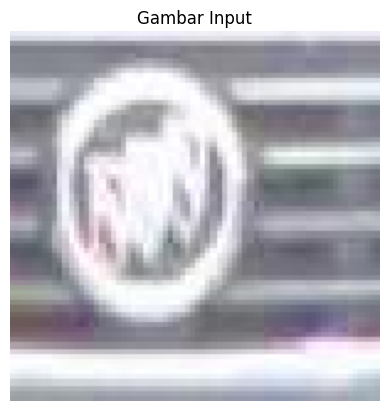

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
Pengujian pada Arsitektur VGG16
File: 0247.jpg
Prediksi: Buick
Akurasi Keyakinan: 85.28%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

class_indices = train_generator.class_indices
class_names = list(class_indices.keys())

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Gambar Input")
    plt.show()

    # Preprocessing
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.

    predictions = vgg16_model.predict(x)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = predictions[0][predicted_class] * 100

    print("Pengujian pada Arsitektur VGG16")
    print(f"File: {fn}")
    print(f"Prediksi: {class_names[predicted_class]}")
    print(f"Akurasi Keyakinan: {confidence:.2f}%")

Pengujian Arsitektur CNN **RestNet50**

Saving 0187.jpg to 0187.jpg


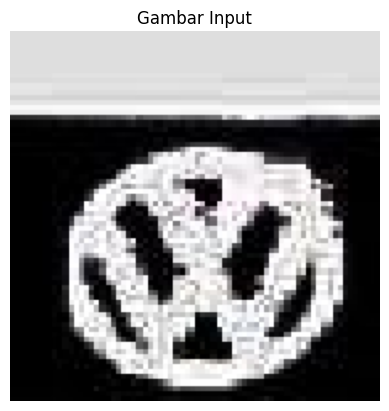

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Pengujian pada Arsitektur MobileNet
File: 0187.jpg
Prediksi: VW
Akurasi Keyakinan: 85.28%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

class_indices = train_generator.class_indices
class_names = list(class_indices.keys())

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Gambar Input")
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0

    predictions = resnet_model.predict(x)
    predicted_class = np.argmax(predictions, axis=1)[0]

    print("Pengujian pada Arsitektur MobileNet")
    print(f"File: {fn}")
    print(f"Prediksi: {class_names[predicted_class]}")
    print(f"Akurasi Keyakinan: {confidence:.2f}%")

Pengujian Arsitektur CNN **MobileNet**

Saving 0380.jpg to 0380.jpg


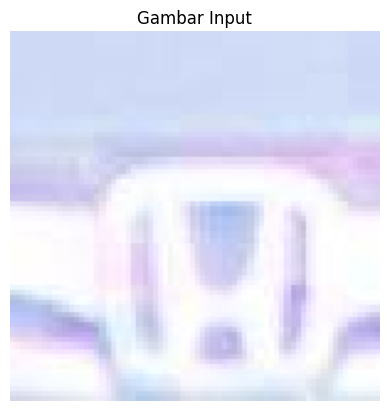

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Pengujian pada Arsitektur MobileNet
File: 0380.jpg
Prediksi: Honda
Akurasi Keyakinan: 99.92%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

class_indices = train_generator.class_indices
class_names = list(class_indices.keys())

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Gambar Input")
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0

    predictions = mobilenet_model.predict(x)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions) * 100

    print("Pengujian pada Arsitektur MobileNet")
    print(f"File: {fn}")
    print(f"Prediksi: {class_names[predicted_class]}")
    print(f"Akurasi Keyakinan: {confidence:.2f}%")

# Visualisasi Data

Visualisasi Data Arsitektur **VGG16**

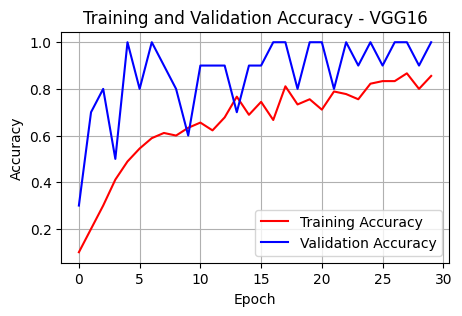

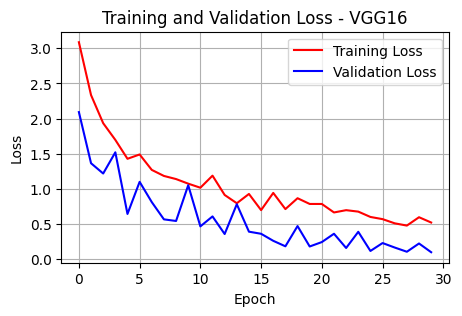

In [ ]:
import matplotlib.pyplot as plt

# Ambil data dari history VGG16
acc = history_vgg16.history['accuracy']
val_acc = history_vgg16.history['val_accuracy']
loss = history_vgg16.history['loss']
val_loss = history_vgg16.history['val_loss']

epochs = range(len(acc))

# Plot Akurasi
plt.figure(figsize=(5, 3))
plt.plot(epochs, acc, 'r-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy - VGG16')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(5, 3))
plt.plot(epochs, loss, 'r-', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss - VGG16')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Visualisasi Data Arsitektur **ResNet50**

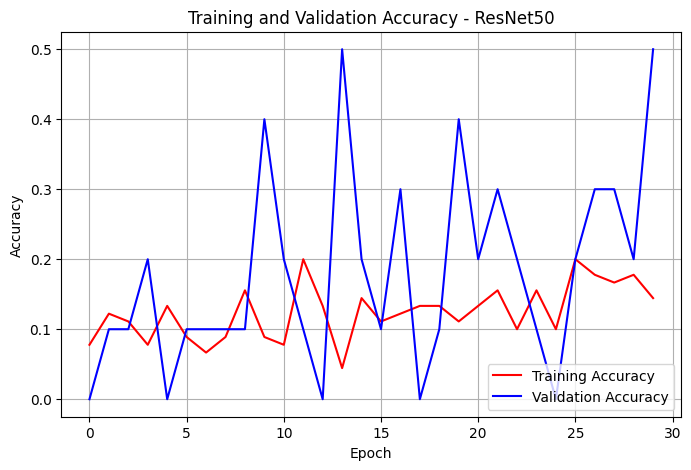

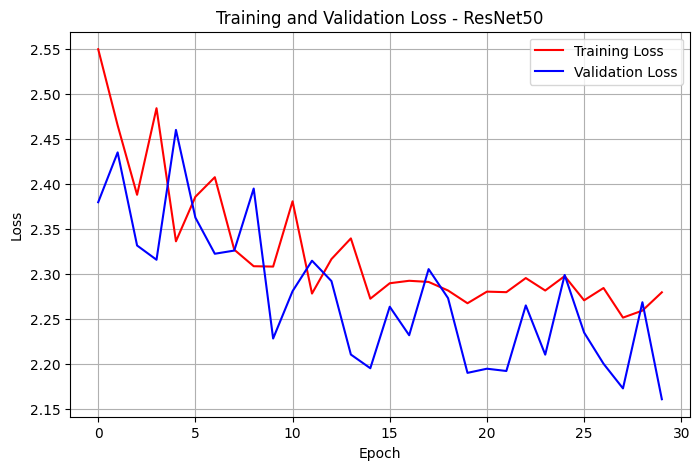

In [ ]:
import matplotlib.pyplot as plt

# Ambil data dari history ResNet50
acc = resnet_history.history['accuracy']
val_acc = resnet_history.history['val_accuracy']
loss = resnet_history.history['loss']
val_loss = resnet_history.history['val_loss']

epochs = range(len(acc))

# Plot Akurasi
plt.figure(figsize=(5, 3))
plt.plot(epochs, acc, 'r-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy - ResNet50')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(5, 3))
plt.plot(epochs, loss, 'r-', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss - ResNet50')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Visualisasi Data Arsitektur **MobileNet**

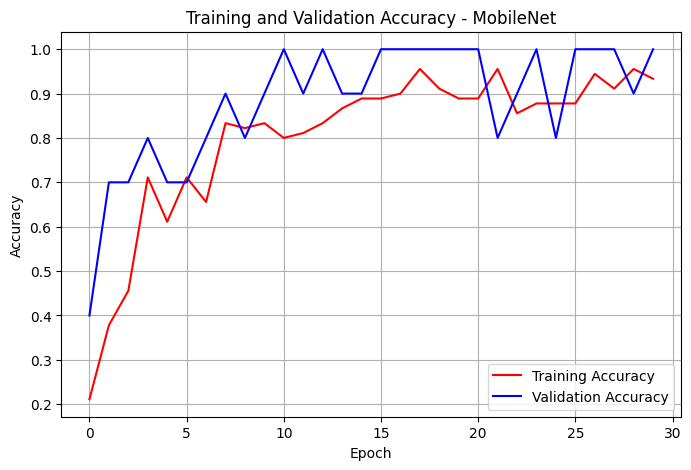

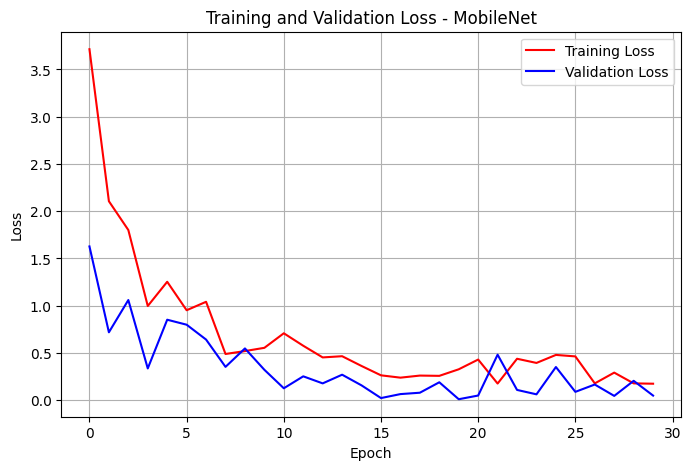

In [ ]:
import matplotlib.pyplot as plt

# Ambil data dari history MobileNet
acc = history_mobilenet.history['accuracy']
val_acc = history_mobilenet.history['val_accuracy']
loss = history_mobilenet.history['loss']
val_loss = history_mobilenet.history['val_loss']

epochs = range(len(acc))

# Plot Akurasi
plt.figure(figsize=(8, 5))
plt.plot(epochs, acc, 'r-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy - MobileNet')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(epochs, loss, 'r-', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss - MobileNet')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk evaluasi model
def evaluate_model(model, val_generator, model_name="Model"):
    # Prediksi
    predictions = model.predict(val_generator, steps=len(val_generator))
    y_pred = np.argmax(predictions, axis=1)

    # Label sebenarnya
    y_true = val_generator.classes

    # Nama kelas
    class_labels = list(val_generator.class_indices.keys())

    # Classification report
    print(f"\n📊 Classification Report - {model_name}")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f' Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step

📊 Classification Report - VGG16
              precision    recall  f1-score   support

       Buick       0.12      0.10      0.11        10
       Chery       0.00      0.00      0.00        10
     Citroen       0.10      0.10      0.10        10
       Honda       0.00      0.00      0.00        10
     Hyundai       0.00      0.00      0.00        10
       Lexus       0.11      0.10      0.11        10
       Mazda       0.27      0.30      0.29        10
     Peugeot       0.30      0.30      0.30        10
      Toyota       0.24      0.40      0.30        10
          VW       0.00      0.00      0.00        10

    accuracy                           0.13       100
   macro avg       0.11      0.13      0.12       100
weighted avg       0.11      0.13      0.12       100



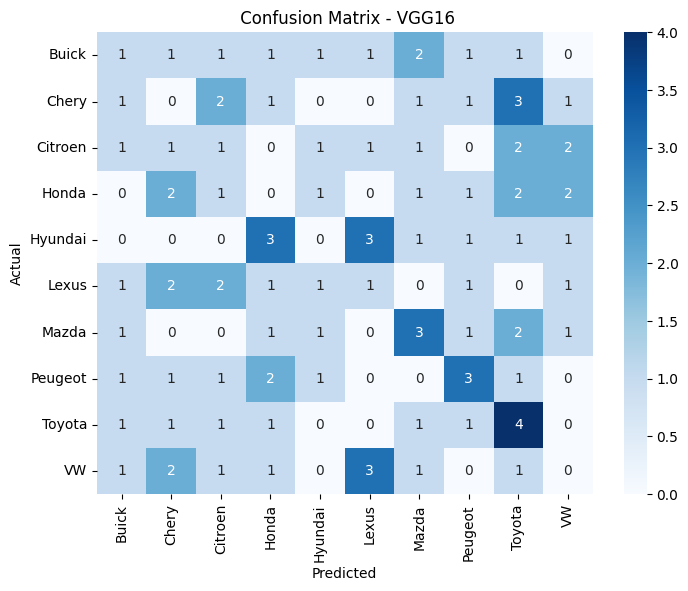

10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 772ms/step

📊 Classification Report - ResNet50
              precision    recall  f1-score   support

       Buick       0.00      0.00      0.00        10
       Chery       0.00      0.00      0.00        10
     Citroen       0.00      0.00      0.00        10
       Honda       0.00      0.00      0.00        10
     Hyundai       0.00      0.00      0.00        10
       Lexus       0.10      0.60      0.17        10
       Mazda       0.31      0.40      0.35        10
     Peugeot       0.00      0.00      0.00        10
      Toyota       0.00      0.00      0.00        10
          VW       0.17      0.30      0.21        10

    accuracy                           0.13       100
   macro avg       0.06      0.13      0.07       100
weighted avg       0.06      0.13      0.07       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


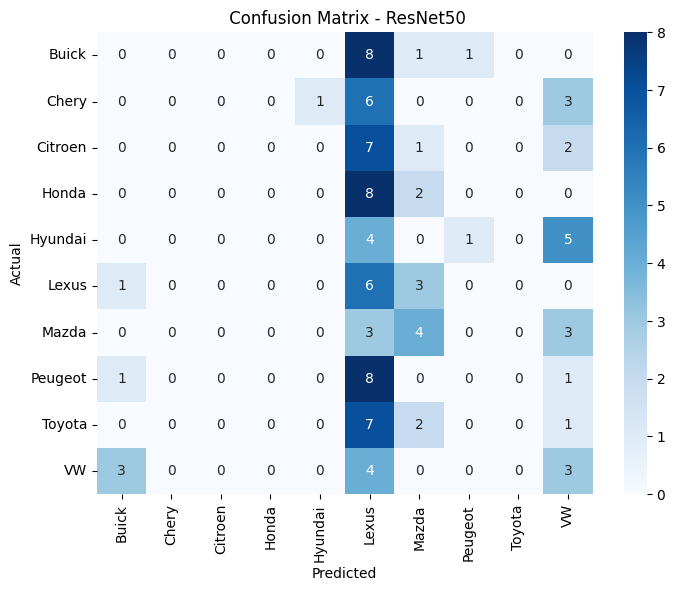

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step

📊 Classification Report - MobileNet
              precision    recall  f1-score   support

       Buick       0.00      0.00      0.00        10
       Chery       0.00      0.00      0.00        10
     Citroen       0.10      0.10      0.10        10
       Honda       0.10      0.10      0.10        10
     Hyundai       0.20      0.20      0.20        10
       Lexus       0.22      0.20      0.21        10
       Mazda       0.00      0.00      0.00        10
     Peugeot       0.00      0.00      0.00        10
      Toyota       0.12      0.10      0.11        10
          VW       0.00      0.00      0.00        10

    accuracy                           0.07       100
   macro avg       0.07      0.07      0.07       100
weighted avg       0.07      0.07      0.07       100



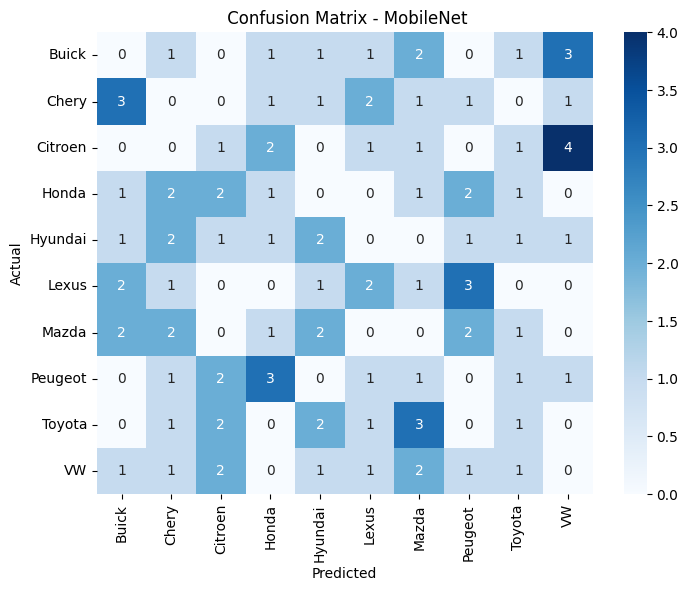

In [ ]:
evaluate_model(vgg16_model, val_generator, model_name="VGG16")
evaluate_model(resnet_model, val_generator, model_name="ResNet50")
evaluate_model(mobilenet_model, val_generator, model_name="MobileNet")